## Stats bombs Lionel Messi Open Data Exploration

In [32]:
# place all the imports here
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Arc, Circle, ConnectionPatch, Rectangle

In [5]:
# load the json file
file = './open-data/data/competitions.json'
with open(file) as train_file:
    dict_train = json.load(train_file)

In [6]:
# load the data on the dictionary for creating a dataframe
dict_new = {}
for i in dict_train:
    for k, v in i.items():
        if k not in dict_new:
            dict_new[k] = [v]
        else:
            dict_new[k].append(v)

In [7]:
# create a dataframe 
df = pd.DataFrame(dict_new)

In [8]:
df

,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
0,16,4,Europe,Champions League,male,2018/2019,2020-07-29T05:00,2020-07-29T05:00
1,16,1,Europe,Champions League,male,2017/2018,2020-07-29T05:00,2020-07-29T05:00
2,16,2,Europe,Champions League,male,2016/2017,2020-08-26T12:33:15.869622,2020-07-29T05:00
3,16,27,Europe,Champions League,male,2015/2016,2020-08-26T12:33:15.869622,2020-07-29T05:00
4,16,26,Europe,Champions League,male,2014/2015,2020-08-26T12:33:15.869622,2020-07-29T05:00
5,16,25,Europe,Champions League,male,2013/2014,2020-08-26T12:33:15.869622,2020-07-29T05:00
6,16,24,Europe,Champions League,male,2012/2013,2020-08-26T12:33:15.869622,2020-07-29T05:00
7,16,23,Europe,Champions League,male,2011/2012,2020-08-26T12:33:15.869622,2020-07-29T05:00
8,16,22,Europe,Champions League,male,2010/2011,2020-07-29T05:00,2020-07-29T05:00
9,16,21,Europe,Champions League,male,2009/2010,2020-07-29T05:00,2020-07-29T05:00


In [9]:
# let's see the unique competition name and the ids

print(df.competition_name.unique())
print(df.competition_id.unique())

['Champions League' "FA Women's Super League" 'FIFA World Cup' 'La Liga'
 'NWSL' 'Premier League' "Women's World Cup"]
[16 37 43 11 49  2 72]


In [10]:
# Messi only plays for Laliga, Champions League, Interantaional mathces for male
competition_messi_plays = ["Champions League", "FIFA World Cup", "La Liga"]

# filter
df = df.loc[df.competition_name.isin(competition_messi_plays)]

# Only male competition
filtered_df = df.loc[df.competition_gender == "male"]

In [11]:
filtered_df.tail()

,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
29,11,41,Spain,La Liga,male,2008/2009,2020-07-29T05:00,2020-07-29T05:00
30,11,40,Spain,La Liga,male,2007/2008,2020-07-29T05:00,2020-07-29T05:00
31,11,39,Spain,La Liga,male,2006/2007,2020-07-29T05:00,2020-07-29T05:00
32,11,38,Spain,La Liga,male,2005/2006,2020-07-29T05:00,2020-07-29T05:00
33,11,37,Spain,La Liga,male,2004/2005,2020-07-29T05:00,2020-07-29T05:00


In [12]:
# competition ids and names
print(df.competition_id.unique())
print(df.competition_name.unique())

[16 43 11]
['Champions League' 'FIFA World Cup' 'La Liga']


In [13]:
# season id
print(df.season_id.unique())

[ 4  1  2 27 26 25 24 23 22 21 41 39 37 44 76  3 42 40 38]


In [15]:
# lets laod some data for one of the competiton 
# --- Enters Champions League -----
"""Ce sont les meilleures equipes"""

clfile = "./open-data/data/matches/16/1.json"
with open(clfile) as train_file:
    cl1 = json.load(train_file)

In [16]:
# A recursive funciton to unwrap nested dictionary:
def unwrap_dict_with_values(d):
    unwraped_dict = {}
    all_index = []
    for key, value in d.items():
        if isinstance(value, dict):
            j, u = unwrap_dict_with_values(value)
            for i in j:
                new_key = str(key)+ "_" + str(i)
                all_index.append(new_key)
                for k, v in u.items():
                    if i == k:
                        unwraped_dict[new_key] = v
        elif isinstance(value, list):
            for li in range(len(value)):
                if isinstance(value[li], dict):
                    j, u = unwrap_dict_with_values(value[li])
                    for i in j:
                        new_key = str(key)+ "_" + str(i)
                        if new_key not in all_index:
                            all_index.append(new_key)
                        for k, v in u.items():
                            if i == k:
                                if new_key not in unwraped_dict:
                                    unwraped_dict[new_key] = [v]
                                else:
                                    unwraped_dict[new_key].append(v)
                else:
                    if key not in all_index:
                        all_index.append(key)
                        unwraped_dict[key] = value
        else:
            all_index.append(key)
            unwraped_dict[key] = value
    return all_index, unwraped_dict

In [17]:
# A recursive funciton to unwrap nested dictionary:
def unwrap_dict(d):
    for key, value in d.items():
        if isinstance(value, dict):
            inner_index = unwrap_dict(value)
            for i in inner_index:
                new_key = str(key)+ "_" + str(i)
                all_index.append(new_key)
        else:
            all_index.append(key)
    return all_index

In [19]:
import os
mypath = "./open-data/data/events"
a = os.listdir(mypath)

In [373]:
# def get_player_data(file_list, player_id, type_id, outcome_id):
#     player_list = []
#     for f in file_list:
#         event = "data/events/" + str(f)
#         with open(event) as event_new:
#             dict_event = json.load(event_new)
        
#         for i in dict_event:
#             player_dict = {}
#             if i["type"]["id"] == type_id:
#                 if i["player"]["id"] == player_id:
#                     if i["shot"]["outcome"]["id"] == outcome_id:
#                         player_dict["match_id"] = f.split(".")[0]
#                         _, ev2= unwrap_dict_with_values(i)
#                         for k, v in ev2.items():
#                             if not isinstance(v, list):
#                                 if k not in player_dict:
#                                     player_dict[k] = v  
                                    
#             if player_dict:
#                 player_list.append(player_dict)
#     return player_list

In [23]:
def get_player_data(file_list, player_id, type_id, outcome_id):
    player_list = []
    for f in file_list:
        event = "./open-data/data/events/" + str(f)
        with open(event) as event_new:
            dict_event = json.load(event_new)
        
        for i in dict_event:
            player_dict = {}
            if i["type"]["id"] == type_id:
                if i["player"]["id"] == player_id:
                    if i["shot"]["outcome"]["id"] == outcome_id:
                        player_dict["match_id"] = f.split(".")[0]
#                         print(json.dumps(i, indent=4, sort_keys=True))
                        _, ev2= unwrap_dict_with_values(i)
                        for k, v in ev2.items():
                            if not isinstance(v, list):
                                if k not in player_dict:
                                    player_dict[k] = v  
                            if isinstance(v, list):
                                index = -1
                                if k == "shot_end_location":
                                    player_dict['shot_end_location_x'] = v[0]
                                    player_dict['shot_end_location_y'] = v[1]
                                    player_dict['shot_end_location_z'] = v[2]
                                if k == "location":
                                    player_dict['location_x'] = v[0]
                                    player_dict['location_y'] = v[1]
                                if k == "shot_freeze_frame_position_id":
                                    index = v.index(1)
                                    print(index)
                                if k == "shot_freeze_frame_player_name":
                                    opp_gk_name = v
                                if k == "shot_freeze_frame_player_id":
                                    opp_gk_id = v  
                                if index != -1:
                                    player_dict['opoosition_gk_id'] = opp_gk_id[index]
                                    player_dict['opposition_gk_name'] = opp_gk_name[index]
                                    print(opp_gk_id[index])
                                    print(opp_gk_name[index])
                                    
            if player_dict:
                player_list.append(player_dict)
    return player_list

In [24]:
messi_list = get_player_data(a, 5503, 16, 97)

14
6792
Pau López Sabata
0
6378
Jan Oblak
0
6768
Diego López Rodríguez
0
6768
Diego López Rodríguez
11
8697
Andrés Eduardo Fernández Moreno
4
8697
Andrés Eduardo Fernández Moreno
7
8697
Andrés Eduardo Fernández Moreno
0
26103
Idriss Carlos Kameni
0
26103
Idriss Carlos Kameni
1
26103
Idriss Carlos Kameni
9
26146
Dudú Aouate
6
26146
Dudú Aouate
0
6395
Kepa Arrizabalaga Revuelta
8
26079
Javier López Vallejo
0
6792
Pau López Sabata
7
6792
Pau López Sabata
0
6792
Pau López Sabata
0
26658
Óscar Alfredo Ustari
9
6768
Diego López Rodríguez
6
6768
Diego López Rodríguez
0
25901
Raúl Valbuena Cano
14
23344
Aitor Fernández Abarisketa
3
26849
Júlio César Jacobi
12
26849
Júlio César Jacobi
5
26849
Júlio César Jacobi
0
6768
Diego López Rodríguez
1
6768
Diego López Rodríguez
4
6768
Diego López Rodríguez
0
24255
Juan Carlos Martín Corral
9
24255
Juan Carlos Martín Corral
4
25144
Diego Alves Carreira
2
6692
Oier Olazábal Paredes
15
25144
Diego Alves Carreira
11
10277
Fabricio Martín Agosto Ramírez
3
102

5
7069
Miguel Ángel Moyà Rumbo
3
7069
Miguel Ángel Moyà Rumbo
13
24040
Cristian Darío Álvarez
12
24040
Cristian Darío Álvarez
11
24264
Daniel Hernández Santos
0
6823
Sergio Rico González
10
6823
Sergio Rico González
7
26029
Daniel Aranzubia Aguado
0
26029
Daniel Aranzubia Aguado
0
26029
Daniel Aranzubia Aguado
3
26484
Antonio Baltasar Doblas Santana
3
6730
Rubén Iván Martínez Andrade
8
6931
Leandro Chichizola
9
27462
Xabier Iruretagoiena Aranzamendi
9
26438
David Cobeño Iglesias
17
6610
Iván Cuéllar Sacristán
9
6610
Iván Cuéllar Sacristán
14
6610
Iván Cuéllar Sacristán
4
25946
Andrés Palop Cervera
10
26146
Dudú Aouate
5
27457
Manuel Fernández Muñíz
9
26070
Antonio Rodríguez Martínez
18
26070
Antonio Rodríguez Martínez
10
6576
Gorka Iraizoz Moreno
1
11302
Jordi Masip López
10
11302
Jordi Masip López
10
10763
Asier Riesgo Unamuno
10
6823
Sergio Rico González
5
6755
Sergio Asenjo Andrés
3
25917
César Sánchez Domínguez
3
25917
César Sánchez Domínguez
8
26070
Antonio Rodríguez Martínez
6
26

In [ ]:
try_unwrap = {'id': 'c49c5561-9253-40a2-a6ce-77f9cd91b828', 'index': 342, 'period': 1, 'timestamp': '00:07:31.666', 'minute': 7, 'second': 31, 'type': {'id': 16, 'name': 'Shot'}, 'possession': 15, 'possession_team': {'id': 217, 'name': 'Barcelona'}, 'play_pattern': {'id': 3, 'name': 'From Free Kick'}, 'team': {'id': 217, 'name': 'Barcelona'}, 'player': {'id': 5503, 'name': 'Lionel Andrés Messi Cuccittini'}, 'position': {'id': 17, 'name': 'Right Wing'}, 'location': [94.7, 41.1], 'duration': 1.351, 'related_events': ['49cf59f1-641a-40b2-8de0-23275d6a8bb3'], 'shot': {'statsbomb_xg': 0.082942344, 'end_location': [120.0, 42.8, 2.1], 'outcome': {'id': 97, 'name': 'Goal'}, 'type': {'id': 62, 'name': 'Free Kick'}, 'body_part': {'id': 38, 'name': 'Left Foot'}, 'technique': {'id': 93, 'name': 'Normal'}, 'freeze_frame': [{'location': [106.1, 48.5], 'player': {'id': 6758, 'name': 'Víctor Sánchez Mata'}, 'position': {'id': 15, 'name': 'Left Center Midfield'}, 'teammate': False}, {'location': [103.0, 30.1], 'player': {'id': 6838, 'name': 'Hernán Arsenio Pérez González'}, 'position': {'id': 17, 'name': 'Right Wing'}, 'teammate': False}, {'location': [105.3, 38.0], 'player': {'id': 16456, 'name': 'Enzo Pablo Roco Roco'}, 'position': {'id': 3, 'name': 'Right Center Back'}, 'teammate': False}, {'location': [105.3, 39.2], 'player': {'id': 18407, 'name': 'José Alberto Cañas Ruiz Herrera'}, 'position': {'id': 13, 'name': 'Right Center Midfield'}, 'teammate': False}, {'location': [105.0, 34.1], 'player': {'id': 27241, 'name': 'Víctor Guillermo Álvarez Delgado'}, 'position': {'id': 6, 'name': 'Left Back'}, 'teammate': False}, {'location': [105.9, 35.8], 'player': {'id': 6612, 'name': 'Rubén Duarte Sánchez'}, 'position': {'id': 5, 'name': 'Left Center Back'}, 'teammate': False}, {'location': [105.4, 40.0], 'player': {'id': 5719, 'name': 'Marco Asensio Willemsen'}, 'position': {'id': 21, 'name': 'Left Wing'}, 'teammate': False}, {'location': [105.3, 41.0], 'player': {'id': 7781, 'name': 'Felipe Salvador Caicedo Corozo'}, 'position': {'id': 23, 'name': 'Center Forward'}, 'teammate': False}, {'location': [105.4, 41.7], 'player': {'id': 6867, 'name': 'Papa Kouly Diop'}, 'position': {'id': 10, 'name': 'Center Defensive Midfield'}, 'teammate': False}, {'location': [105.3, 42.6], 'player': {'id': 6791, 'name': 'Javier López Rodríguez'}, 'position': {'id': 2, 'name': 'Right Back'}, 'teammate': False}, {'location': [106.5, 38.9], 'player': {'id': 5203, 'name': 'Sergio Busquets i Burgos'}, 'position': {'id': 10, 'name': 'Center Defensive Midfield'}, 'teammate': True}, {'location': [106.4, 37.5], 'player': {'id': 5213, 'name': 'Gerard Piqué Bernabéu'}, 'position': {'id': 3, 'name': 'Right Center Back'}, 'teammate': True}, {'location': [96.8, 31.1], 'player': {'id': 5506, 'name': 'Javier Alejandro Mascherano'}, 'position': {'id': 5, 'name': 'Left Center Back'}, 'teammate': True}, {'location': [105.8, 33.2], 'player': {'id': 5470, 'name': 'Ivan Rakitić'}, 'position': {'id': 15, 'name': 'Left Center Midfield'}, 'teammate': True}, {'location': [118.9, 40.1], 'player': {'id': 6792, 'name': 'Pau López Sabata'}, 'position': {'id': 1, 'name': 'Goalkeeper'}, 'teammate': False}, {'location': [107.0, 48.9], 'player': {'id': 5246, 'name': 'Luis Alberto Suárez Díaz'}, 'position': {'id': 23, 'name': 'Center Forward'}, 'teammate': True}, {'location': [92.5, 39.3], 'player': {'id': 4320, 'name': 'Neymar da Silva Santos Junior'}, 'position': {'id': 21, 'name': 'Left Wing'}, 'teammate': True}, {'location': [93.2, 52.0], 'player': {'id': 4324, 'name': 'Daniel Alves da Silva'}, 'position': {'id': 2, 'name': 'Right Back'}, 'teammate': True}]}}

In [428]:
# for k, v in try_unwrap.items():
#     if isinstance(v, dict):
#         print(k)
#         for key, value in v.items():
#             print("______________", key)
#     else:
#         print(k)

In [718]:
# _a, _b = unwrap_dict_with_values(try_unwrap)

# try_list = get_player_data(a[:4], 5503, 16, 97)

14
6792
Pau López Sabata


In [25]:
messi_laliga = pd.DataFrame(messi_list)

In [38]:
messi_laliga.to_csv('messi_laliga_goals.csv')

In [27]:
minutes = messi_laliga.minute.unique()
seconds = messi_laliga.second.unique()

(array([31., 44., 42., 45., 38., 54., 52., 46., 68., 27.]),
 array([ 2. , 11.6, 21.2, 30.8, 40.4, 50. , 59.6, 69.2, 78.8, 88.4, 98. ]),
 <a list of 10 Patch objects>)

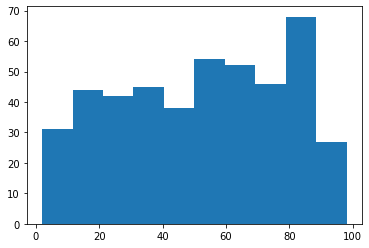

In [35]:
plt.hist(messi_laliga.minute)

In [724]:
messi_laliga.columns

Index(['match_id', 'id', 'index', 'period', 'timestamp', 'minute', 'second',
       'type_id', 'type_name', 'possession', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'player_id', 'player_name', 'position_id',
       'position_name', 'location_x', 'location_y', 'duration',
       'shot_statsbomb_xg', 'shot_end_location_x', 'shot_end_location_y',
       'shot_end_location_z', 'shot_outcome_id', 'shot_outcome_name',
       'shot_type_id', 'shot_type_name', 'shot_body_part_id',
       'shot_body_part_name', 'shot_technique_id', 'shot_technique_name',
       'opoosition_gk_id', 'opposition_gk_name', 'shot_one_on_one',
       'under_pressure', 'shot_key_pass_id', 'shot_deflected',
       'shot_first_time', 'shot_open_goal', 'shot_redirect'],
      dtype='object')

In [725]:
messi_shots_start = []
for i, j in zip(messi_laliga.location_x.values, messi_laliga.location_y.values):
    new = []
    new.append(i)
    new.append(j)
    messi_shots_start.append(new)

messi_shots_end = []
for i, j in zip(messi_laliga.shot_end_location_x.values, messi_laliga.shot_end_location_y.values):
    new = []
    new.append(i)
    new.append(j)
    messi_shots_end.append(new)

In [731]:
messi_laliga.opposition_gk_name.nunique()

100

In [727]:
opp_gk = messi_laliga.opposition_gk_name.tolist()

In [728]:
opp_gk_dict = {}
for i in opp_gk:
    if i not in opp_gk_dict:
        opp_gk_dict[i] = 1
    else:
        opp_gk_dict[i] += 1

In [729]:
opp_gk_dict

{'Pau López Sabata': 8,
 'Jan Oblak': 8,
 'Diego López Rodríguez': 12,
 'Andrés Eduardo Fernández Moreno': 15,
 'Idriss Carlos Kameni': 6,
 'Dudú Aouate': 9,
 'Kepa Arrizabalaga Revuelta': 2,
 'Javier López Vallejo': 1,
 'Óscar Alfredo Ustari': 1,
 'Raúl Valbuena Cano': 1,
 'Aitor Fernández Abarisketa': 2,
 'Júlio César Jacobi': 4,
 nan: 51,
 'Juan Carlos Martín Corral': 7,
 'Diego Alves Carreira': 17,
 'Oier Olazábal Paredes': 5,
 'Fabricio Martín Agosto Ramírez': 5,
 'Sergio Herrera Pirón': 1,
 'Antonio Rodríguez Martínez': 10,
 'António Alberto Bastos Pimparel': 7,
 'Keylor Navas Gamboa': 5,
 'Rubén Pérez Chueca': 2,
 'Iker Casillas Fernández': 9,
 'Claudio Andrés Bravo Muñoz': 8,
 'Thibaut Courtois': 6,
 'Julián Cuesta Díaz': 1,
 'Roberto Jiménez Gago': 12,
 'Cristian Darío Álvarez': 4,
 'César Sánchez Domínguez': 6,
 'Iván Cuéllar Sacristán': 10,
 'Vladan Kujović': 1,
 'Sergio Rico González': 6,
 'Marko Dmitrović': 10,
 'Esteban Andrés Suárez': 2,
 'David de Gea Quintana': 4,
 'Da

In [265]:
import numpy as np
np.sort(minutes)


array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 98])

In [270]:
np.sort(seconds)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

In [284]:
messi_minute_dict = {}
for i in range(messi_laliga.shape[0]):
    if messi_laliga.minute.iloc[i] not in messi_minute_dict:
        messi_minute_dict[messi_laliga.minute.iloc[i]] = 1
    else:
        messi_minute_dict[messi_laliga.minute.iloc[i]] += 1

In [352]:
max_goals = 0
for k, v in messi_minute_dict.items():
    if v > max_goals:
        max_goals = v

In [335]:
def give_range_goals(lower, upper, goal_dict):
    total = 0
    if upper == 0:
        return goal_dict[lower]
    for i in range(lower, upper):
        if i in goal_dict:
            total = total + goal_dict[i]
    return total

In [340]:
give_range_goals(1, 1+3, messi_minute_dict)\

3

In [337]:
def highest_interval_range(interval, goal_dict):
    ll = 0
    goals = 0
    for i in range(1, 99):
        t = give_range_goals(i, i+interval, goal_dict)
        if t > goals:
            ll = i
            goals = t
    return ll

In [348]:
productive_time = highest_interval_range(2, messi_minute_dict)

In [349]:
productive_time

90

In [351]:
messi_minute_dict[91]

10

In [490]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Arc, Circle, ConnectionPatch, Rectangle

class Pitch:
    """
    Pitch object. Represents a dynamic pitch visualization.
    
    Methods
    -------
    plot_player
    plot_pass
    plot_heatmap
    show
    """

    # default dims to match ArqamFc data
    _width = 120
    _hight = 80
    _fig_size = (12, 8)

    def __init__(self):
        _, ax = plt.subplots(figsize=self._fig_size)
        ax.axis('off')  # this hides the x and y ticks
        plt.ylim(-2, 82)
        plt.xlim(-2, 122)
        pitch_components = self._build_pitch()
        for c in pitch_components:
            ax.add_artist(c)

        self._plt = plt
        self._ax = ax

    def show(self):
        """
        Same as plt.show()
        """
        self._plt.show()

    def plot_player(self, x, y, number=False, color=''):
        """
        Plot a player figure for the pitch figure 
        Parameters
        ----------
        x : x position of the player(float).
        y : y position of the player(float).
        number: player jersey number[optional].
        color: player color. Same as matplotlib color (named, hexa, rbg)
        Returns
        -------
        None
        """
        if not color:
            color = 'firebrick'
        p = Circle((x, y), 1.5, color='black', fc=color)
        self._ax.add_artist(p)
        if number:
            self._ax.annotate(number, xy=(x-0.9, y-0.3), fontsize=7) # align the text with the circle
    
    def plot_pass(self, start, end, pass_type='low',color=''):
        """
        Plot a new pass in the pitch
        Parameters
        ----------
        start : (X(float), Y(float)) represents start location of the path.
        end : (X(float), Y(float)) represents end location of the path.
        pass_type : str represents the pass type (high, low, ground)
        color: pass arrow color. Same as matplotlib color (named, hexa, rbg)
        Returns
        -------
        True if 
        """
        
        if not color:
            color = 'orange'
        if pass_type == 'low':
            line = 'D'
        elif pass_type == 'ground':
            line = 'o'
        elif pass_type == 'high':
            line = '*'
        else:
            raise TypeError('Invalid pass type')
        if self._invalid_position(start) or self._invalid_position(end):
            raise TypeError('Location should be in range (0~120)(0~80)')
        self._plt.plot(
            [start[0], end[0]],
            [start[1], end[1]], color=color)
        self._plt.plot(start[0], start[1], line, color='green')

    def _invalid_position(self, loc):
        """
        *this is an internal non-public method*
        check if specific location is valid
        Parameters
        ----------
        loc : (float, float) represents location 
        Returns
        -------
        True if 
        """
        return loc[0] < 0 or loc[1] < 0 or loc[0] > self._width or loc[1] > self._hight
    
    def _build_pitch(self, fig_type='complete'):
        """
        *this is an internal non-public method*
        build plt pitch figure 
        Parameters
        ----------
        fig_type : pitch type. Either compelete, right-half or left-half.
        Returns
        -------
        List of matplotlib patches which builds up the figure.
        """
        if fig_type == 'complete':
            return [
                Rectangle((0, 0), width=self._width, height=self._hight,
                            fill=False, color='grey'),  # pitch
                Rectangle([0, 22.3], width=14.6, height=35.3,
                            fill=False),  # left penalty area
                Rectangle([105.4, 22.3], width=14.6, height=35.3,
                            fill=False),  # right penalty area
                ConnectionPatch([60, 0], [60, 80], "data", "data"),
                Rectangle([0, 32], width=4.9, height=16, fill=False),
                Rectangle([115.1, 32], width=4.9, height=16, fill=False),
                plt.Circle((60, 40), 9.1, color="black", fill=False),
                plt.Circle((60, 40), 0.33, color="black"),
                plt.Circle((9.7, 40), 0.33, color="black"),
                plt.Circle((110.3, 40), 0.33, color="black"),
                Arc((9.7, 40), height=16.2, width=16.2, angle=0,
                    theta1=310, theta2=50, color="black"),
                Arc((110.3, 40), height=16.2, width=16.2, angle=0,
                    theta1=130, theta2=230, color="black")
            ]
        else:
            raise NotImplementedError

    def heat_map(self, x, y, color=''):
        """
        Add heatmap for the pitch figure 
        Parameters
        ----------
        x : array of x(float) positions in the pitch.
        y : array of y(float) positions in the pitch.
        Returns
        -------
        None
        """
        sns.kdeplot(x, y, shade=True, n_levels=50, color=color)

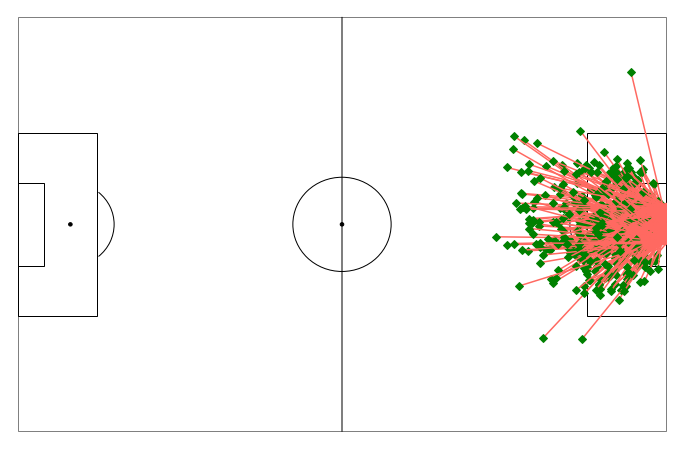

In [544]:
messi = Pitch()
for i, j in zip(messi_shots_start, messi_shots_end):
    messi.plot_pass(i, j, 'low', "#ff6961")

In [552]:
import random
random.randint(0, 120)

36

In [675]:
x = []
y = []
for i in range(0, 11):
    x.append(random.randint(0, 120))
    y.append(random.randint(0, 80))

In [676]:
# x = [60, 40, 80, 20, 1, 119, 14, 80]

In [677]:
# y = [40, 60, 20, 40, 1, 20, 113, 40]

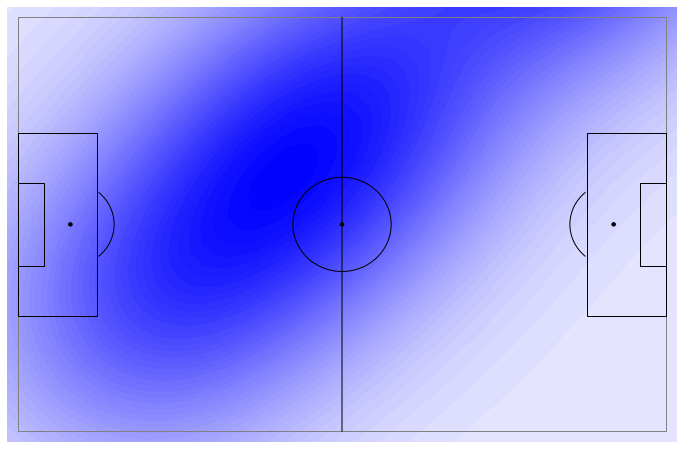

In [678]:
z = Pitch()
z.heat_map(x, x, color = 'blue')